In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot') #Style sheet

In [77]:
# Load datasets
cash = pd.read_csv('https://raw.githubusercontent.com/kurtisjw/project-1-ironhack-payments-es/main/project_dataset/extract%20-%20cash%20request%20-%20data%20analyst.csv')
fees = pd.read_csv('https://raw.githubusercontent.com/kurtisjw/project-1-ironhack-payments-es/main/project_dataset/extract%20-%20fees%20-%20data%20analyst%20-%20.csv')

In [78]:
cash.head(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [79]:
cash.columns

Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')

In [80]:
fees.head(5)

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [81]:
fees.columns

Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')

In [82]:
# Convert 'created_at' data type to to datetime
cash['created_at'] = pd.to_datetime(cash['created_at'])

In [83]:
# Create month and cohorts columns
cash.sort_values(by='user_id', inplace=True)
cash['month'] = cash['created_at'].dt.to_period('M')
cash['cohorts'] = cash.groupby('user_id')['month'].transform('min')
cash[['cohorts', 'month', 'user_id']].head(10)

C:\Users\ivani\AppData\Local\Temp\ipykernel_2468\286522853.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['month'] = cash['created_at'].dt.to_period('M')


,cohorts,month,user_id
538,2020-04,2020-04,34.0
91,2019-12,2020-02,35.0
345,2019-12,2020-01,35.0
5298,2019-12,2020-08,35.0
58,2019-12,2019-12,35.0
180,2019-12,2019-12,35.0
6842,2019-12,2020-09,35.0
670,2019-12,2020-03,35.0
1037,2019-11,2020-08,47.0
445,2019-11,2020-04,47.0


In [84]:
# Group cash by cohortes column and calculate the number of unique user IDs in each cohort month using the nunique function. Store result in cohort_user_counts
# Reset Index

cohort_user_counts = cash.groupby('cohorts')['user_id'].nunique().reset_index()
# cohort_user_counts.to_csv('cohort_users_total.csv')

In [85]:
# Calculate the count of unique users who made their first loan in each cohort month ('cohorts') and had subsequent loans in each regular month ('month').
cohort_month_user_counts = cash.groupby(['cohorts', 'month'])['user_id'].nunique().reset_index()
cohort_month_user_counts

# The 'cash' dataframe is grouped by two columns, 'cohortes' (cohort month) and 'month' (regular month). Within each group the nunique function counts the number of unique user IDs. This calculates how many unique users from each cohort month continued to engage with the platform in each regular month.

,cohorts,month,user_id
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,660
79,2020-09,2020-11,20
80,2020-10,2020-10,4694
81,2020-10,2020-11,15


In [86]:
# Group the cohort_month_user_counts DataFrame by the cohort month ('cohorts') column.
# Within each group, select the first row, representing the counts of unique users for the initial regular month of each cohort.
first_cohort_month_counts = cohort_month_user_counts.groupby('cohorts').first()
first_cohort_month_counts

,month,user_id
cohorts,,
2019-11,2019-11,1
2019-12,2019-12,204
2020-01,2020-01,90
2020-02,2020-02,84
2020-03,2020-03,69
2020-04,2020-04,212
2020-05,2020-05,369
2020-06,2020-06,1338
2020-07,2020-07,1294


<Axes: xlabel='Cohorts', ylabel='Total Users'>

<Figure size 1200x800 with 0 Axes>

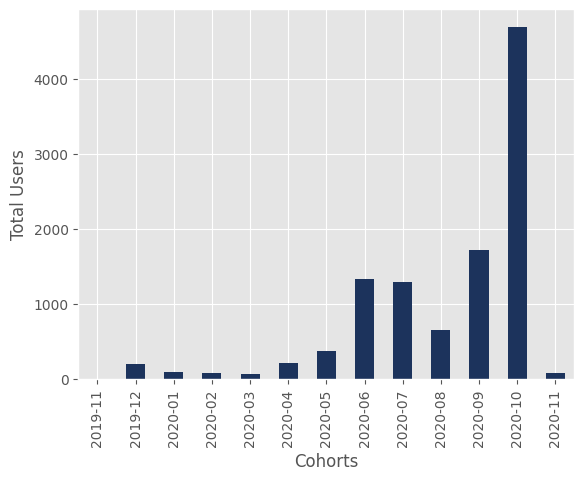

In [87]:
plt.figure(figsize=(12,8))
cmap = sns.color_palette(["#1c335c"] * len(first_cohort_month_counts))
first_cohort_month_counts.plot(kind='bar', color=cmap, xlabel='Cohorts', ylabel='Total Users', legend=False)

In [88]:
# Create a pivot table and calculate customer retention rate
retention = cohort_month_user_counts.pivot(index='cohorts', columns='month', values='user_id').divide(first_cohort_month_counts['user_id'], axis=0) * 100
retention

month,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohorts,,,,,,,,,,,,,
2019-11,100.0,100.0,NaN,NaN,NaN,100.000000,100.000000,NaN,NaN,100.000000,100.000000,100.000000,NaN
2019-12,NaN,100.0,33.823529,21.568627,27.450980,25.980392,32.352941,28.921569,25.490196,30.882353,20.588235,28.921569,0.490196
2020-01,NaN,NaN,100.000000,21.111111,15.555556,30.000000,25.555556,26.666667,30.000000,23.333333,22.222222,25.555556,1.111111
2020-02,NaN,NaN,NaN,100.000000,52.380952,48.809524,48.809524,45.238095,42.857143,42.857143,29.761905,41.666667,NaN
2020-03,NaN,NaN,NaN,NaN,100.000000,50.724638,46.376812,59.420290,43.478261,40.579710,37.681159,39.130435,1.449275
2020-04,NaN,NaN,NaN,NaN,NaN,100.000000,49.056604,50.943396,39.622642,35.849057,31.132075,27.830189,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,61.517615,53.658537,45.257453,34.688347,40.108401,0.813008
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,52.092676,51.569507,40.358744,40.508221,0.298954
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,49.922720,37.403400,39.489954,0.540958


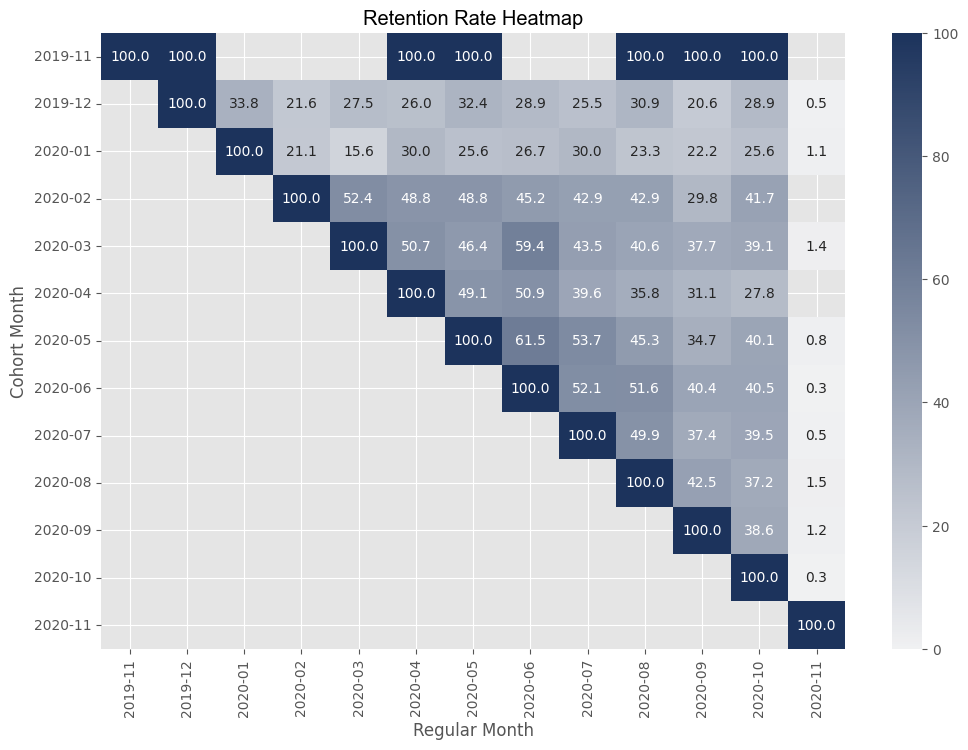

In [89]:
# Create heatmap visualisation to display the retention rates of our cohorts
plt.figure(figsize=(12,8))
cmap = sns.light_palette("#1c335c", as_cmap=True)
sns.heatmap(retention, annot=True, fmt=".1f", cmap=cmap, vmin=0, vmax=100)

# Add title and axis labels
plt.title('Retention Rate Heatmap', fontname='Arial')
plt.xlabel('Regular Month')
plt.ylabel('Cohort Month')

plt.show()

<Axes: title={'center': 'Income Per Cohort'}, xlabel='Cohort', ylabel='Total Amount'>

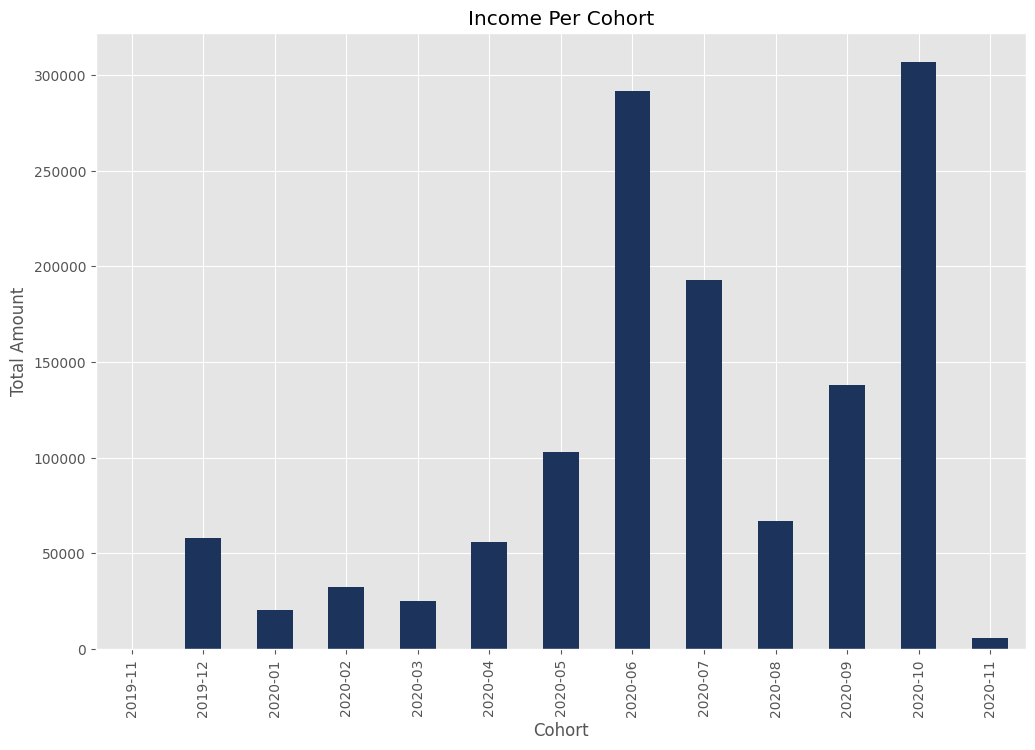

In [90]:
# Create barplot to display income generated per cohort
plt.figure(figsize=(12,8))
income_cohort = cash[cash['status'] == 'money_back'].groupby('cohorts')['amount'].sum()
cmap = sns.color_palette(["#1c335c"] * len(income_cohort))
income_cohort.plot(kind='bar', ylabel= 'Total Amount', xlabel='Cohort', title='Income Per Cohort', color=cmap)

In [91]:
income_cohort = cash[cash['status'] == 'money_back'].groupby('cohorts')['amount'].agg(income_total = ('sum')).reset_index()
income_cohort = income_cohort.merge(first_cohort_month_counts, on='cohorts').drop(columns='month')

In [92]:
income_cohort

,cohorts,income_total,user_id
0,2019-11,131.0,1
1,2019-12,57932.0,204
2,2020-01,20086.0,90
3,2020-02,32132.0,84
4,2020-03,24940.0,69
5,2020-04,55962.0,212
6,2020-05,102877.0,369
7,2020-06,291764.0,1338
8,2020-07,192995.0,1294
9,2020-08,66685.0,656


C:\Users\ivani\AppData\Local\Temp\ipykernel_2468\1052720189.py:36: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax1.legend(bars, labels, loc='upper left')


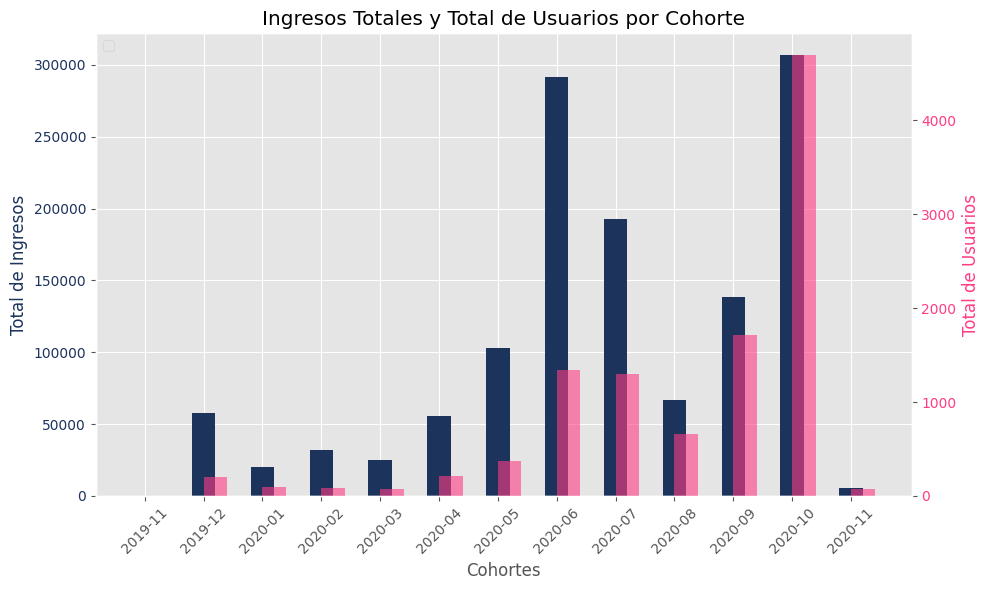

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos
data = {
    'cohorts': ['2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11'],
    'income_total': [131.0, 57932.0, 20086.0, 32132.0, 24940.0, 55962.0, 102877.0, 291764.0, 192995.0, 66685.0, 138163.0, 306710.0, 5510.0],
    'user_id': [1, 204, 90, 84, 69, 212, 369, 1338, 1294, 656, 1712, 4694, 75]
}

df = pd.DataFrame(data)

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45)

# Gráfico de barras para income_total
bar_width = 0.4
bar1 = ax1.bar(df['cohorts'], df['income_total'], bar_width, color='#1c335c', alpha=1, label='Total de Ingresos')
ax1.set_xlabel('Cohortes')
ax1.set_ylabel('Total de Ingresos', color='#1c335c')
ax1.tick_params(axis='y', labelcolor='#1c335c')

# Crear un segundo eje y para el total de usuarios
ax2 = ax1.twinx()
bar2 = ax2.bar(df['cohorts'], df['user_id'], bar_width, color='#ff3c85', alpha=0.6, label='Total de Usuarios', align='edge')
ax2.set_ylabel('Total de Usuarios', color='#ff3c85')
ax2.tick_params(axis='y', labelcolor='#ff3c85')

# Título y leyendas
plt.title('Ingresos Totales y Total de Usuarios por Cohorte')

# Agregar leyenda combinada
bars = bar1 + bar2
labels = [bar.get_label() for bar in bars]
ax1.legend(bars, labels, loc='upper left')

# Ajustar el diseño
fig.tight_layout()
plt.grid(False)
# Mostrar el gráfico
plt.show()


In [94]:
cash.head(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,month,cohorts
538,1302,100.0,rejected,2020-04-20 15:50:21.187257+00:00,2020-04-22 12:03:34.439811+00,34.0,2020-04-22 12:03:34.434712+00,NaN,2020-04-27 15:50:21.18689+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-04,2020-04
91,758,90.0,rejected,2020-02-28 10:51:11.440880+00:00,2020-02-28 14:13:21.50435+00,35.0,2020-02-28 14:13:21.501335+00,NaN,2020-03-07 23:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-02,2019-12
345,510,90.0,rejected,2020-01-27 19:50:46.387431+00:00,2020-01-28 14:52:30.164273+00,35.0,2020-01-28 14:52:30.160427+00,NaN,2020-02-03 19:50:46.387008+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-01,2019-12
5298,12794,100.0,rejected,2020-08-17 13:19:41.318905+00:00,2020-08-17 15:04:14.916382+00,35.0,2020-08-17 15:04:14.912309+00,NaN,2020-09-07 22:00:00+00,NaN,NaN,instant,2020-08-24 13:19:41.267425+00,NaN,NaN,NaN,2020-08,2019-12
58,150,100.0,rejected,2019-12-13 20:27:38.106778+00:00,2019-12-18 15:20:41.722482+00,35.0,2019-12-18 15:20:41.715612+00,NaN,2019-12-20 20:27:38.106319+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12


In [95]:
# Group by 'cohorts' and 'status' to get the count of each status value for each cohort
cohort_status_counts = cash.groupby(['cohorts', 'status'])['user_id'].count()

# Reset index to convert the result into a DataFrame
cohort_status_counts = cohort_status_counts.reset_index()

# Pivot the DataFrame to have 'first_loan_month' as index and 'status' values as columns
cohort_status_counts_pivot = cohort_status_counts.pivot(index='cohorts', columns='status', values='user_id')

# Fill missing values with 0
cohort_status_counts_pivot = cohort_status_counts_pivot.fillna(0)

# Display the resulting DataFrame
cohort_status_counts_pivot

status,active,canceled,direct_debit_rejected,direct_debit_sent,money_back,rejected,transaction_declined
cohorts,,,,,,,
2019-11,0.0,1.0,0.0,0.0,6.0,1.0,0.0
2019-12,0.0,0.0,39.0,2.0,611.0,240.0,1.0
2020-01,0.0,0.0,11.0,0.0,207.0,103.0,0.0
2020-02,1.0,0.0,8.0,0.0,336.0,77.0,1.0
2020-03,1.0,0.0,4.0,1.0,248.0,69.0,0.0
2020-04,0.0,0.0,34.0,1.0,593.0,212.0,0.0
2020-05,1.0,0.0,38.0,2.0,1096.0,312.0,0.0
2020-06,12.0,2.0,119.0,4.0,3197.0,1369.0,8.0
2020-07,14.0,2.0,132.0,3.0,2230.0,1349.0,5.0


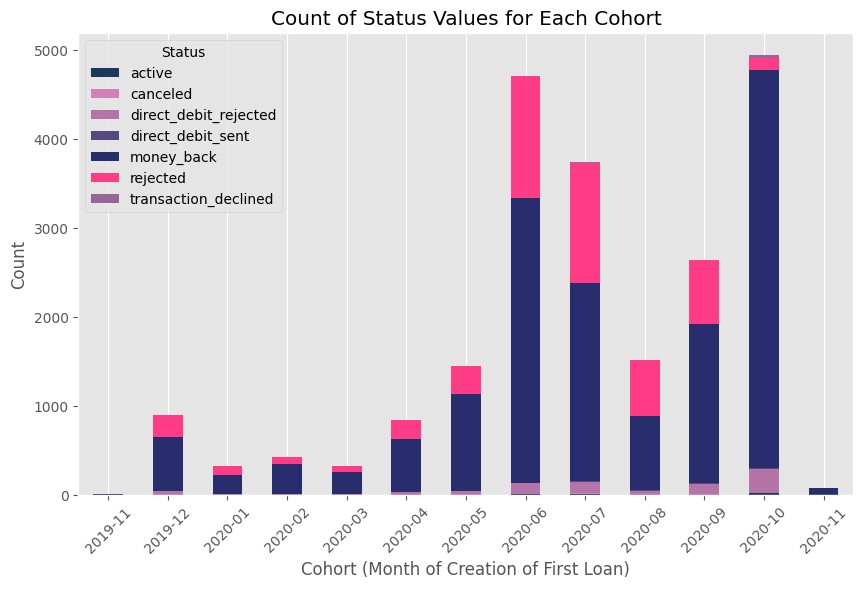

In [96]:
# Stacked Bar Chart
blue_colors = ['#1c395c', '#282e6d', '#55497f', '#715490']
red_colors = ['#ff3c85', '#d281b8', '#b474a8', '#956799']
color_mapping = {
    'active': blue_colors[0],
    'money_back': blue_colors[1],
    'canceled': red_colors[1],
    'rejected': red_colors[0],
    'direct_debit_rejected': red_colors[2],
    'direct_debit_sent': blue_colors[2],
    'transaction_declined': red_colors[3]
}
cohort_status_counts_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=color_mapping)
plt.title('Count of Status Values for Each Cohort')
plt.xlabel('Cohort (Month of Creation of First Loan)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()

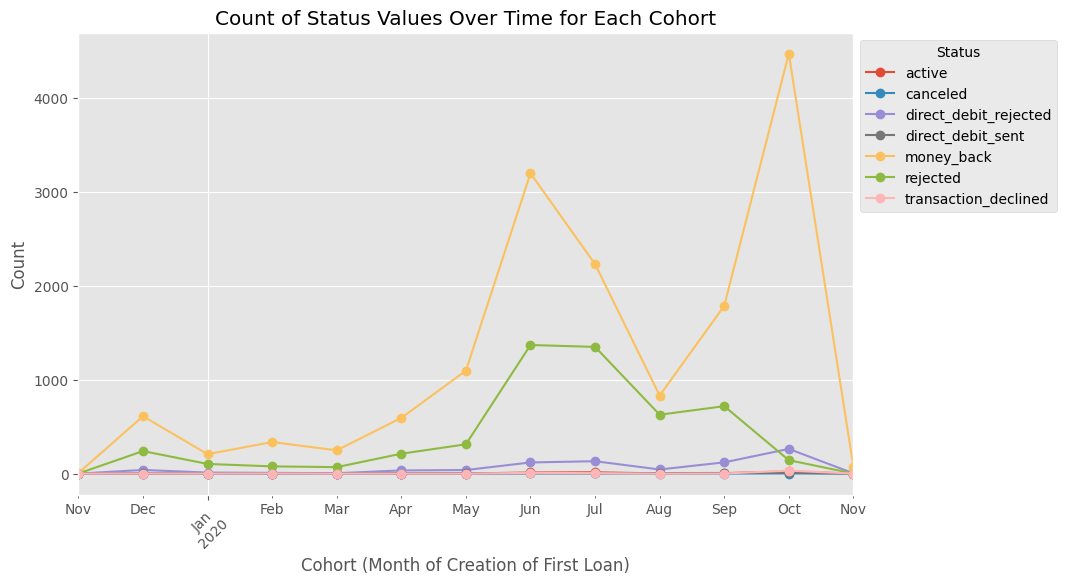

In [97]:
# Line Chart
cohort_status_counts_pivot.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Count of Status Values Over Time for Each Cohort')
plt.xlabel('Cohort (Month of Creation of First Loan)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Text(0, 0.5, 'Cohorts')

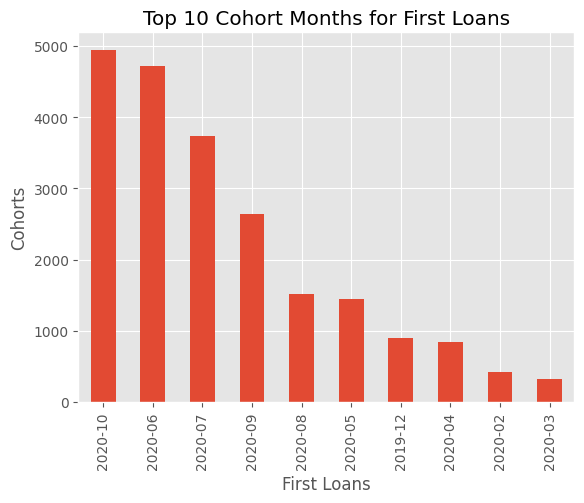

In [98]:
cash['cohorts'].value_counts() \
.head(10) \
.plot(kind = 'bar', title = 'Top 10 Cohort Months for First Loans')
plt.xlabel('First Loans')
plt.ylabel('Cohorts')

Text(0, 0.5, 'Frequency')

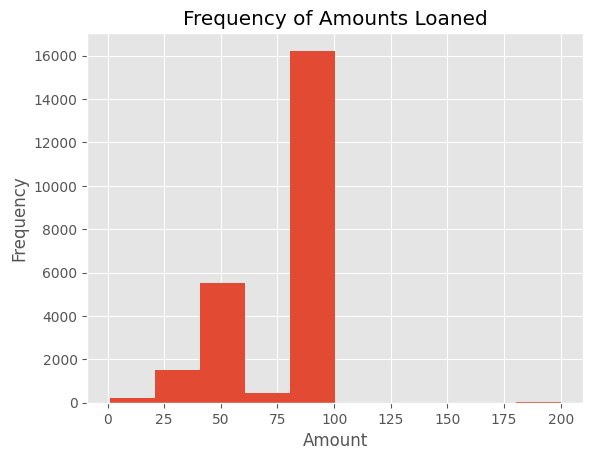

In [99]:
cash['amount'].plot(kind = 'hist', bins = 10)
plt.title('Frequency of Amounts Loaned')
plt.xlabel('Amount')
plt.ylabel('Frequency')

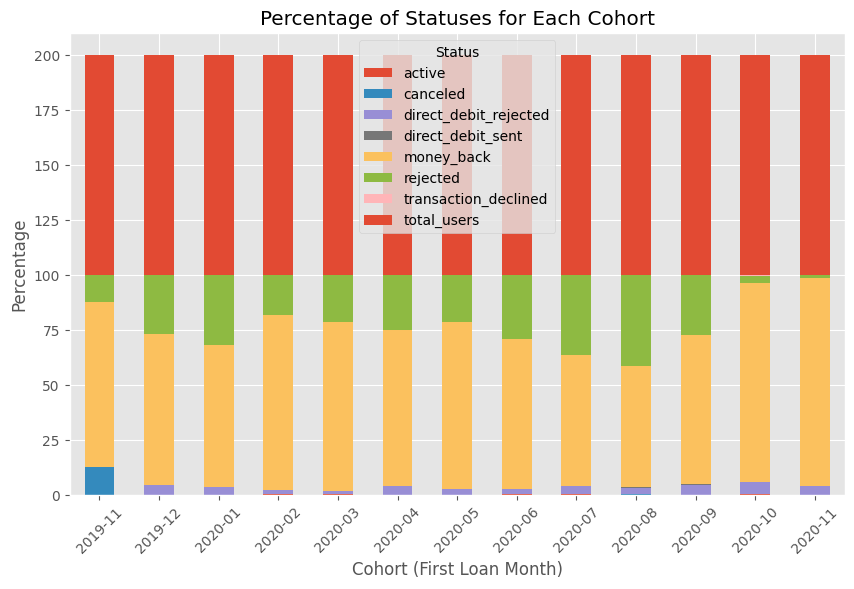

In [100]:
# Calculate total users for each cohort
cohort_status_counts_pivot['total_users'] = cohort_status_counts_pivot.sum(axis=1)

# Calculate percentage of each status for each cohort
cohort_status_counts_pivot_percentage = cohort_status_counts_pivot.div(cohort_status_counts_pivot['total_users'], axis=0) * 100

# Visualize the data
cohort_status_counts_pivot_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of Statuses for Each Cohort')
plt.xlabel('Cohort (First Loan Month)')
plt.ylabel('Percentage')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.show()

In [101]:
cash.head(5)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,month,cohorts
538,1302,100.0,rejected,2020-04-20 15:50:21.187257+00:00,2020-04-22 12:03:34.439811+00,34.0,2020-04-22 12:03:34.434712+00,NaN,2020-04-27 15:50:21.18689+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-04,2020-04
91,758,90.0,rejected,2020-02-28 10:51:11.440880+00:00,2020-02-28 14:13:21.50435+00,35.0,2020-02-28 14:13:21.501335+00,NaN,2020-03-07 23:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-02,2019-12
345,510,90.0,rejected,2020-01-27 19:50:46.387431+00:00,2020-01-28 14:52:30.164273+00,35.0,2020-01-28 14:52:30.160427+00,NaN,2020-02-03 19:50:46.387008+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020-01,2019-12
5298,12794,100.0,rejected,2020-08-17 13:19:41.318905+00:00,2020-08-17 15:04:14.916382+00,35.0,2020-08-17 15:04:14.912309+00,NaN,2020-09-07 22:00:00+00,NaN,NaN,instant,2020-08-24 13:19:41.267425+00,NaN,NaN,NaN,2020-08,2019-12
58,150,100.0,rejected,2019-12-13 20:27:38.106778+00:00,2019-12-18 15:20:41.722482+00,35.0,2019-12-18 15:20:41.715612+00,NaN,2019-12-20 20:27:38.106319+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019-12,2019-12


# RFM (recency, frequency, monetary)
Ranking division of users by quantiles from 4 to 1 being 4 the highest value and 1 the lowest:

1. Monetary

In [102]:
# Calculation of income per user
income_user = cash[cash['status'] == 'money_back'].groupby(['user_id', 'cohorts'])['amount'].agg(total_income='sum').reset_index()
income_user

,user_id,cohorts,total_income
0,47.0,2019-11,131.0
1,52.0,2019-12,140.0
2,53.0,2019-12,400.0
3,66.0,2020-04,50.0
4,68.0,2019-12,30.0
...,...,...,...
8982,103425.0,2020-11,100.0
8983,103437.0,2020-11,100.0
8984,103496.0,2020-11,100.0
8985,103503.0,2020-11,50.0


In [152]:
# Divide the 'amount' column into 4 quantiles
income_user['monetary_ranking'], monetary_bin_edges = pd.qcut(income_user['total_income'], q=4, labels=['1', '2', '3', '4'], retbins=True)

,user_id,cohorts,monetary_ranking,total_use,use_ranking,total_incidents,income_incident_rate
total_income,,,,,,,
1.0,1,1,1,1,1,1,1
2.0,1,1,1,1,1,1,1
10.0,1,1,1,1,1,1,1
20.0,16,16,16,16,16,16,16
25.0,144,144,144,144,144,144,144
...,...,...,...,...,...,...,...
850.0,1,1,1,1,1,1,1
900.0,3,3,3,3,3,3,3
920.0,1,1,1,1,1,1,1


In [151]:
monetary_bin_edges

array([   1.,   50.,  100.,  200., 1000.])

In [105]:
# Count of users groupped by cohorts and monetary ranking
monetary_group = income_user.groupby(['cohorts', 'monetary_ranking'])['user_id'].agg(total=('count')).reset_index()
monetary_group

C:\Users\ivani\AppData\Local\Temp\ipykernel_2468\3528470830.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monetary_group = income_user.groupby(['cohorts', 'monetary_ranking'])['user_id'].agg(total=('count')).reset_index()


,cohorts,monetary_ranking,total
0,2019-11,1,0
1,2019-11,2,0
2,2019-11,3,1
3,2019-11,4,0
4,2019-12,1,8
5,2019-12,2,29
6,2019-12,3,21
7,2019-12,4,82
8,2020-01,1,2
9,2020-01,2,13


In [106]:
# Total of users per cohort
cohort_totals = monetary_group.groupby('cohorts')['total'].sum()
cohort_totals

cohorts
2019-11       1
2019-12     140
2020-01      53
2020-02      65
2020-03      59
2020-04     170
2020-05     323
2020-06    1089
2020-07     936
2020-08     458
2020-09    1294
2020-10    4328
2020-11      71
Freq: M, Name: total, dtype: int64

In [107]:
# Merge the total to the monetary group table
monetary_group = monetary_group.merge(cohort_totals, on='cohorts', how='left')
monetary_group.head()

,cohorts,monetary_ranking,total_x,total_y
0,2019-11,1,0,1
1,2019-11,2,0,1
2,2019-11,3,1,1
3,2019-11,4,0,1
4,2019-12,1,8,140


In [108]:
# Calculate the percentage in a new column
monetary_group['percentage'] = monetary_group['total_x'] / monetary_group['total_y'] * 100
monetary_group.head(5)

,cohorts,monetary_ranking,total_x,total_y,percentage
0,2019-11,1,0,1,0.000000
1,2019-11,2,0,1,0.000000
2,2019-11,3,1,1,100.000000
3,2019-11,4,0,1,0.000000
4,2019-12,1,8,140,5.714286


<Axes: xlabel='monetary_ranking', ylabel='cohorts'>

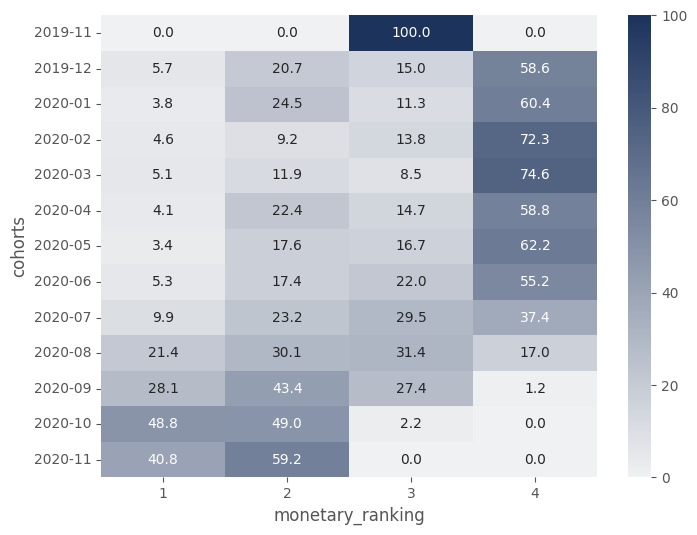

In [109]:
pivot_table_monetary = monetary_group.pivot(index='cohorts', columns='monetary_ranking', values='percentage')
cmap = sns.light_palette("#1c335c", as_cmap=True)
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table_monetary,annot=True, fmt=".1f", cmap=cmap)

2. Frequency of use

In [110]:
# Number of transaction completed (status == 'money_back') per user
freq_user = cash[cash['status'] == 'money_back'].groupby(['user_id', 'cohorts'])['amount'].agg(total_use='count').reset_index()
freq_user

,user_id,cohorts,total_use
0,47.0,2019-11,6
1,52.0,2019-12,4
2,53.0,2019-12,4
3,66.0,2020-04,1
4,68.0,2019-12,1
...,...,...,...
8982,103425.0,2020-11,1
8983,103437.0,2020-11,1
8984,103496.0,2020-11,1
8985,103503.0,2020-11,1


In [111]:
# Add total_use column to income_user table
income_user = income_user.join(freq_user['total_use'])
income_user

,user_id,cohorts,total_income,monetary_ranking,total_use
0,47.0,2019-11,131.0,3,6
1,52.0,2019-12,140.0,3,4
2,53.0,2019-12,400.0,4,4
3,66.0,2020-04,50.0,1,1
4,68.0,2019-12,30.0,1,1
...,...,...,...,...,...
8982,103425.0,2020-11,100.0,2,1
8983,103437.0,2020-11,100.0,2,1
8984,103496.0,2020-11,100.0,2,1
8985,103503.0,2020-11,50.0,1,1


In [145]:
# Total use ranking
income_user['total_use'].max()
use_bins = [0, 3, 6, 9, 11]
income_user['use_ranking'], use_bin_edges = pd.cut(income_user['total_use'], bins=use_bins, labels=['1','2','3','4'], retbins=True)
income_user.head(10)

,user_id,cohorts,total_income,monetary_ranking,total_use,use_ranking,total_incidents,income_incident_rate
0,47.0,2019-11,131.0,3,6,2,2,65.50
1,72.0,2020-01,270.0,4,4,2,8,33.75
2,87.0,2020-08,150.0,3,3,1,3,50.00
3,114.0,2019-12,1000.0,4,10,4,1,1000.00
4,204.0,2020-06,150.0,3,3,1,1,150.00
5,205.0,2019-12,200.0,3,2,1,2,100.00
6,213.0,2020-01,200.0,3,2,1,5,40.00
7,231.0,2019-12,800.0,4,8,3,2,400.00
8,277.0,2020-06,100.0,2,1,1,4,25.00
9,297.0,2019-12,700.0,4,7,3,1,700.00


In [146]:
use_bin_edges

array([ 0,  3,  6,  9, 11])

In [147]:
income_user.groupby('total_use').count()

,user_id,cohorts,total_income,monetary_ranking,use_ranking,total_incidents,income_incident_rate
total_use,,,,,,,
1,671,671,671,671,671,671,671
2,340,340,340,340,340,340,340
3,228,228,228,228,228,228,228
4,114,114,114,114,114,114,114
5,47,47,47,47,47,47,47
6,31,31,31,31,31,31,31
7,13,13,13,13,13,13,13
8,8,8,8,8,8,8,8
9,4,4,4,4,4,4,4


In [114]:
# Count of people ranked per cohort
use_rate_cohort = income_user.groupby(['cohorts', 'use_ranking'])['total_use'].agg(total=('count')).reset_index()

# Total of people per cohort
cohort_totals
use_rate_cohort = use_rate_cohort.merge(cohort_totals, on='cohorts', how='left')

# Percentage of ranked people per cohort
use_rate_cohort['use_percentage'] = use_rate_cohort['total_x'] / use_rate_cohort['total_y'] * 100

# Pivot table calculating the percentage of ranked people per cohort
pivot_table_use = use_rate_cohort.pivot(index='cohorts', columns='use_ranking', values='use_percentage')

C:\Users\ivani\AppData\Local\Temp\ipykernel_2468\2827763636.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  use_rate_cohort = income_user.groupby(['cohorts', 'use_ranking'])['total_use'].agg(total=('count')).reset_index()


In [148]:
use_rate_cohort

,cohorts,use_ranking,total_x,total_y,use_percentage
0,2019-11,1,0,1,0.000000
1,2019-11,2,1,1,100.000000
2,2019-11,3,0,1,0.000000
3,2019-11,4,0,1,0.000000
4,2019-12,1,71,140,50.714286
5,2019-12,2,29,140,20.714286
6,2019-12,3,19,140,13.571429
7,2019-12,4,21,140,15.000000
8,2020-01,1,25,53,47.169811
9,2020-01,2,18,53,33.962264


<Axes: xlabel='use_ranking', ylabel='cohorts'>

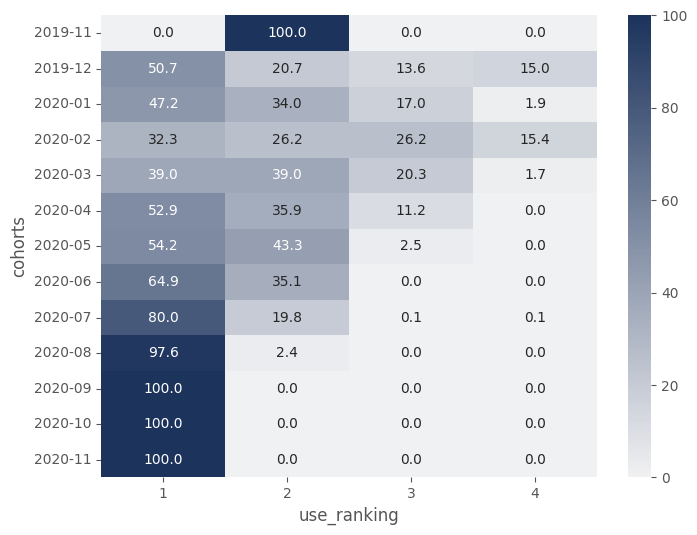

In [149]:
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table_use,annot=True, fmt=".1f", cmap=cmap)

3. Recency of Use

In [117]:
# Copy of dataframe to preserve data
user_rank = income_user.copy()
user_rank

,user_id,cohorts,total_income,monetary_ranking,total_use,use_ranking
0,47.0,2019-11,131.0,3,6,2
1,52.0,2019-12,140.0,3,4,2
2,53.0,2019-12,400.0,4,4,2
3,66.0,2020-04,50.0,1,1,1
4,68.0,2019-12,30.0,1,1,1
...,...,...,...,...,...,...
8982,103425.0,2020-11,100.0,2,1,1
8983,103437.0,2020-11,100.0,2,1,1
8984,103496.0,2020-11,100.0,2,1,1
8985,103503.0,2020-11,50.0,1,1,1


In [118]:
# Storage last use of id
user_rank['last_use'] = cash.groupby('user_id')['month'].transform('max')
unique_month = user_rank['last_use'].sort_values().unique()

# Creating the mapping dictionary
period_to_index = {period: i for i, period in enumerate(user_rank['last_use'].dropna().unique(), start=1)}
period_to_index[pd.NaT] = None  # Handling NaT values; assign None, -1, or another placeholder as needed

# Applying the mapping to create a new index column
user_rank['last_use_index'] = user_rank['last_use'].map(period_to_index)
user_rank

,user_id,cohorts,total_income,monetary_ranking,total_use,use_ranking,last_use,last_use_index
0,47.0,2019-11,131.0,3,6,2,2019-12,1.0
1,52.0,2019-12,140.0,3,4,2,2020-10,2.0
2,53.0,2019-12,400.0,4,4,2,2020-02,3.0
3,66.0,2020-04,50.0,1,1,1,2019-12,1.0
4,68.0,2019-12,30.0,1,1,1,2020-05,4.0
...,...,...,...,...,...,...,...,...
8982,103425.0,2020-11,100.0,2,1,1,2020-09,5.0
8983,103437.0,2020-11,100.0,2,1,1,2020-10,2.0
8984,103496.0,2020-11,100.0,2,1,1,2020-10,2.0
8985,103503.0,2020-11,50.0,1,1,1,2020-10,2.0


In [119]:
months = user_rank.groupby('last_use_index')['cohorts'].count()
months

last_use_index
1.0       60
2.0     3247
3.0       38
4.0      127
5.0     1619
6.0       65
7.0      791
8.0      973
9.0       73
10.0     399
11.0      85
12.0      73
Name: cohorts, dtype: int64

In [120]:
# Creating recency_ranking
recency_bins = [0, 3.0, 6.0, 9.0, 12.0]
user_rank['recency_ranking'], recency_bin_edges = pd.cut(user_rank['last_use_index'], bins=recency_bins, labels=['4','3','2','1'], retbins=True)

In [121]:
last_use_rate = user_rank.groupby(['cohorts', 'recency_ranking'])['recency_ranking'].agg(total = ('count')).reset_index()
last_use_rate_total = last_use_rate.groupby(['cohorts'])['total'].sum()
last_use_rate = last_use_rate.merge(last_use_rate_total, on='cohorts')
last_use_rate['recency_percentage'] = last_use_rate['total_x'] / last_use_rate['total_y'] * 100

C:\Users\ivani\AppData\Local\Temp\ipykernel_2468\3916563952.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  last_use_rate = user_rank.groupby(['cohorts', 'recency_ranking'])['recency_ranking'].agg(total = ('count')).reset_index()


In [122]:
last_use_rate.head()

,cohorts,recency_ranking,total_x,total_y,recency_percentage
0,2019-11,4,1,1,100.000000
1,2019-11,3,0,1,0.000000
2,2019-11,2,0,1,0.000000
3,2019-11,1,0,1,0.000000
4,2019-12,4,56,119,47.058824


In [123]:
recency_bin_edges

array([ 0.,  3.,  6.,  9., 12.])

<Axes: xlabel='recency_ranking', ylabel='cohorts'>

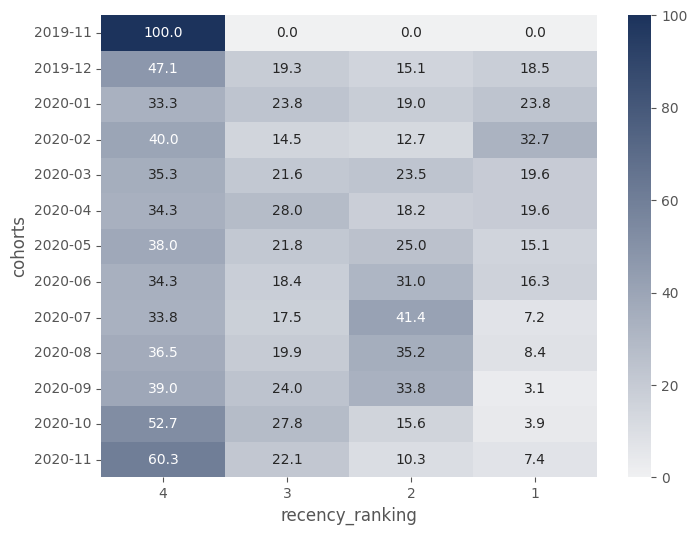

In [138]:
pivot_table_recency = last_use_rate.pivot(index='cohorts', columns='recency_ranking', values='recency_percentage')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table_recency,annot=True, fmt=".1f", cmap=cmap)

# USER RANKING BASED ON RFM

In [125]:
# Creating a user ranking column as a sum of the 3 indicators (recency, frequency, and monetary)

# Converting categorical ranking to numerical
user_rank['monetary_ranking'] = pd.to_numeric(user_rank['monetary_ranking'])
user_rank['use_ranking'] = pd.to_numeric(user_rank['use_ranking'])
user_rank['recency_ranking'] = pd.to_numeric(user_rank['recency_ranking'])
user_rank['recency_ranking'].dropna()

# Adding the value to the 3 indicators to a final column
user_rank['user_ranking'] = user_rank['monetary_ranking'] + user_rank['use_ranking'] + user_rank['recency_ranking']
user_rank

,user_id,cohorts,total_income,monetary_ranking,total_use,use_ranking,last_use,last_use_index,recency_ranking,user_ranking
0,47.0,2019-11,131.0,3,6,2,2019-12,1.0,4.0,9.0
1,52.0,2019-12,140.0,3,4,2,2020-10,2.0,4.0,9.0
2,53.0,2019-12,400.0,4,4,2,2020-02,3.0,4.0,10.0
3,66.0,2020-04,50.0,1,1,1,2019-12,1.0,4.0,6.0
4,68.0,2019-12,30.0,1,1,1,2020-05,4.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...
8982,103425.0,2020-11,100.0,2,1,1,2020-09,5.0,3.0,6.0
8983,103437.0,2020-11,100.0,2,1,1,2020-10,2.0,4.0,7.0
8984,103496.0,2020-11,100.0,2,1,1,2020-10,2.0,4.0,7.0
8985,103503.0,2020-11,50.0,1,1,1,2020-10,2.0,4.0,6.0


<Axes: xlabel='user_ranking', ylabel='cohorts'>

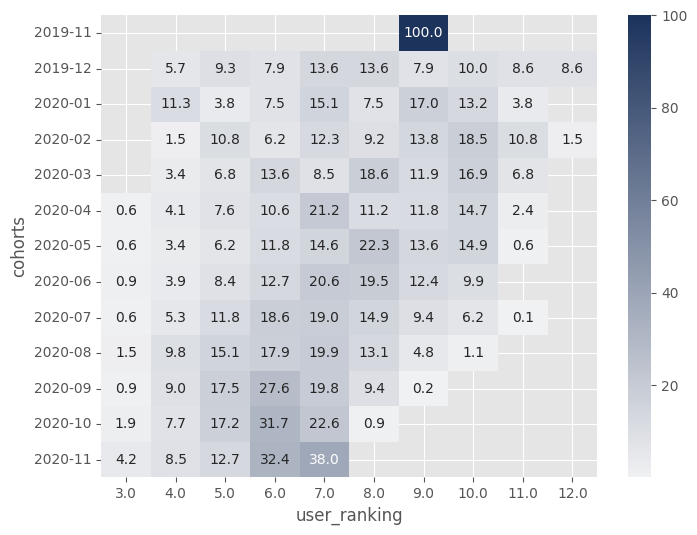

In [139]:
# Best clients
best_clients = user_rank.sort_values(by='user_ranking', ascending=False)

# Best cohorts: cohorts with more best clients
best_cohorts = best_clients.groupby(['cohorts', 'user_ranking'])['user_id'].agg(total_ranked=('count')).reset_index()
best_cohorts

# Best cohorts percentage
best_cohorts = best_cohorts.merge(cohort_totals, on='cohorts')
best_cohorts['percentage'] = best_cohorts['total_ranked'] / best_cohorts['total'] * 100
best_cohorts_grouped = best_cohorts.groupby(['cohorts', 'user_ranking'])['percentage'].sum().reset_index()

# Pivot table
best_cohorts_pivot_table = best_cohorts.pivot(index='cohorts', columns='user_ranking', values='percentage')
plt.figure(figsize=(8,6))
sns.heatmap(best_cohorts_pivot_table,annot=True, fmt=".1f", cmap=cmap)


In [127]:
best_cohorts_grouped

,cohorts,user_ranking,percentage
0,2019-11,9.0,100.000000
1,2019-12,4.0,5.714286
2,2019-12,5.0,9.285714
3,2019-12,6.0,7.857143
4,2019-12,7.0,13.571429
...,...,...,...
91,2020-11,3.0,4.225352
92,2020-11,4.0,8.450704
93,2020-11,5.0,12.676056
94,2020-11,6.0,32.394366


# AMOUNT - FREQUENCY OF USE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


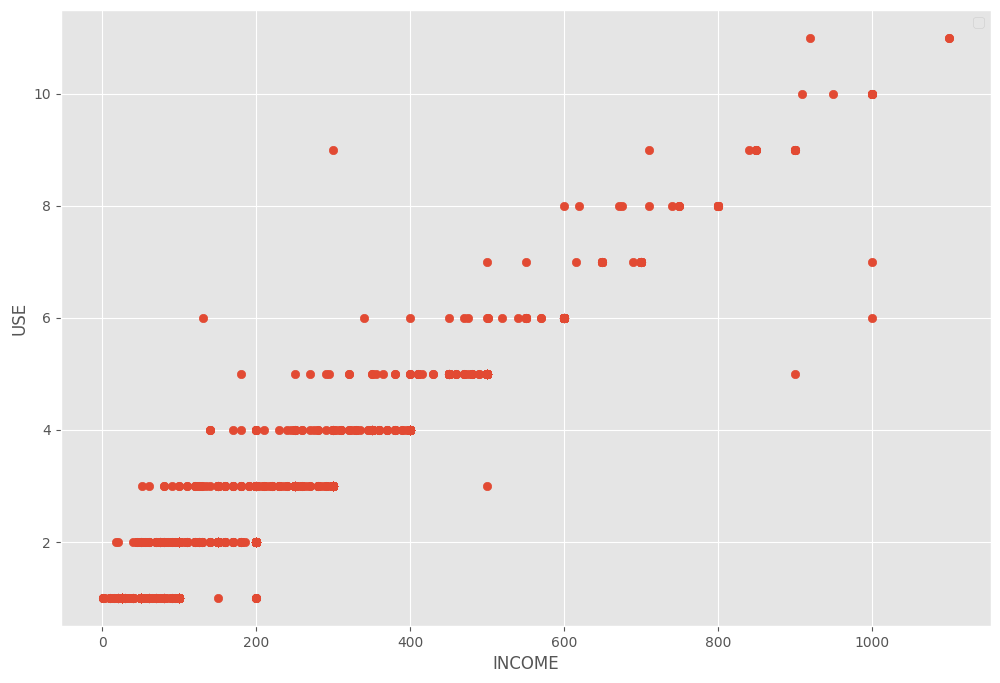

In [128]:
# Scatter plot of relation amount-frequency of use
plt.figure(figsize=(12,8))
plt.scatter(income_user['total_income'],income_user['total_use'])
plt.ylabel('USE')
plt.xlabel('INCOME')
plt.legend()
plt.show()

In [129]:
# Top - Bottom user regarding the total_income
top_users = income_user.sort_values(by='total_income', ascending=False).head(100)
bottom_users = income_user.sort_values(by='total_income', ascending=False).tail(100)

# Total of incidents

In [130]:
# Total incident ('status' different from 'money_back')
top_incidents = cash[(cash['status'] != 'money_back') & (cash['status'] != 'accepted')].groupby(['user_id'])['user_id'].agg(total_incidents=('count')).reset_index()
top_incidents

,user_id,total_incidents
0,34.0,1
1,35.0,7
2,47.0,2
3,72.0,8
4,83.0,1
...,...,...
3267,100751.0,1
3268,101289.0,1
3269,102720.0,1
3270,102740.0,1


In [131]:
# Add column 'total_incidents' to income_user dataframe
income_user = pd.merge(income_user, top_incidents, on='user_id', how='inner')
income_user

,user_id,cohorts,total_income,monetary_ranking,total_use,use_ranking,total_incidents
0,47.0,2019-11,131.0,3,6,2,2
1,72.0,2020-01,270.0,4,4,2,8
2,87.0,2020-08,150.0,3,3,1,3
3,114.0,2019-12,1000.0,4,10,4,1
4,204.0,2020-06,150.0,3,3,1,1
...,...,...,...,...,...,...,...
1456,93737.0,2020-10,50.0,1,1,1,1
1457,96899.0,2020-10,100.0,2,1,1,1
1458,97665.0,2020-10,100.0,2,1,1,1
1459,98294.0,2020-10,100.0,2,1,1,1


In [132]:
# Incident - total_income relation
income_user['income_incident_rate'] = income_user['total_income'] / income_user['total_incidents']
income_user.sort_values(by='income_incident_rate', ascending=False)
income_user

,user_id,cohorts,total_income,monetary_ranking,total_use,use_ranking,total_incidents,income_incident_rate
0,47.0,2019-11,131.0,3,6,2,2,65.50
1,72.0,2020-01,270.0,4,4,2,8,33.75
2,87.0,2020-08,150.0,3,3,1,3,50.00
3,114.0,2019-12,1000.0,4,10,4,1,1000.00
4,204.0,2020-06,150.0,3,3,1,1,150.00
...,...,...,...,...,...,...,...,...
1456,93737.0,2020-10,50.0,1,1,1,1,50.00
1457,96899.0,2020-10,100.0,2,1,1,1,100.00
1458,97665.0,2020-10,100.0,2,1,1,1,100.00
1459,98294.0,2020-10,100.0,2,1,1,1,100.00


# COHORTS AMOUNT / FREQUENCY

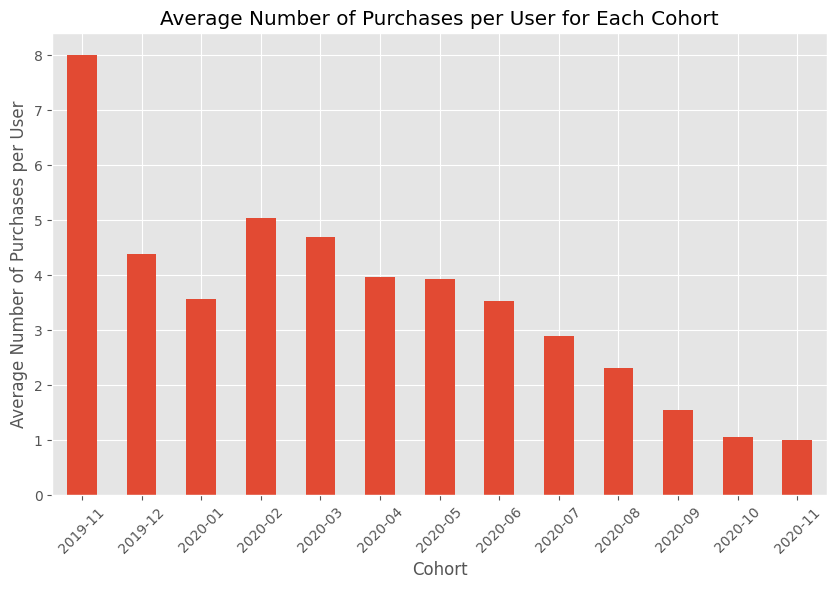

In [133]:
# Group cash data by cohorts and calculate frequency of purchases per user
usage_frequency = cash.groupby('cohorts')['user_id'].count() / cash.groupby('cohorts')['user_id'].nunique()
# Visualize the usage frequency
usage_frequency.plot(kind='bar', figsize=(10, 6))
plt.title('Average Number of Purchases per User for Each Cohort')
plt.xlabel('Cohort')
plt.ylabel('Average Number of Purchases per User')
plt.xticks(rotation=45)
plt.show()

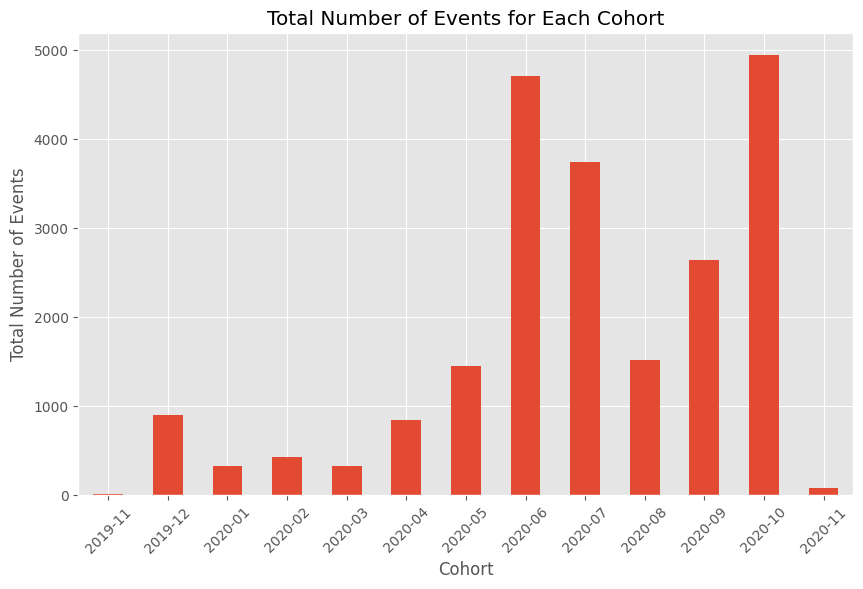

In [134]:
usage_frequency_total = cash.groupby('cohorts')['user_id'].count()
# Visualize the total usage frequency
usage_frequency_total.plot(kind='bar', figsize=(10, 6))
plt.title('Total Number of Events for Each Cohort')
plt.xlabel('Cohort')
plt.ylabel('Total Number of Events')
plt.xticks(rotation=45)
plt.show()

In [135]:
total_amount_purchases = cash.groupby('cohorts')['amount'].sum()
# Calculate total number of purchases per cohort
total_number_purchases = cash.groupby('cohorts')['user_id'].count()
# Merge DataFrames
merged_data = pd.merge(total_amount_purchases, total_number_purchases, on='cohorts')
# Calculate correlation
correlation = merged_data['amount'].corr(merged_data['user_id'])
print("Correlation between total number of purchases and total amount of purchases:", correlation)

Correlation between total number of purchases and total amount of purchases: 0.9859285978532178


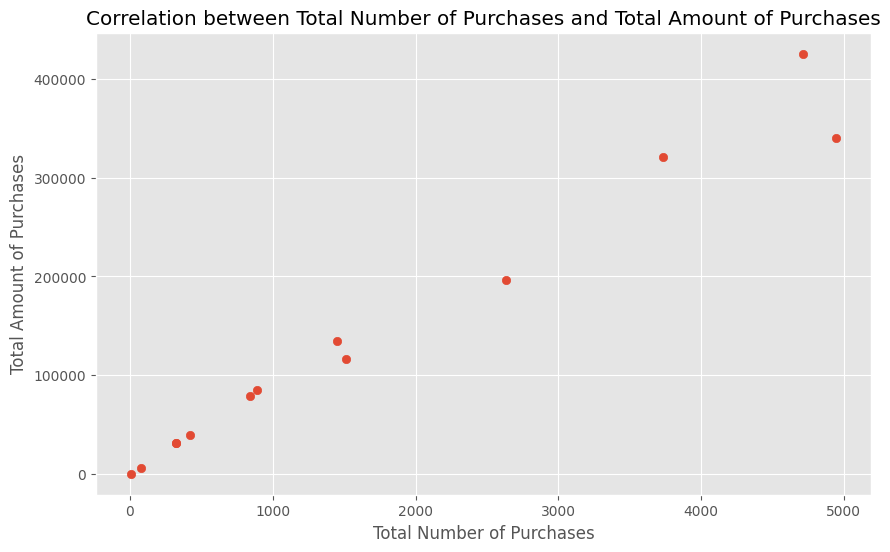

In [136]:
# Calculate total amount of purchases per cohort
total_amount_purchases = cash.groupby('cohorts')['amount'].sum()
# Calculate total number of purchases per cohort
total_number_purchases = cash.groupby('cohorts')['user_id'].count()
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(total_number_purchases, total_amount_purchases)
plt.title('Correlation between Total Number of Purchases and Total Amount of Purchases')
plt.xlabel('Total Number of Purchases')
plt.ylabel('Total Amount of Purchases')
plt.grid(True)
plt.show()